In [62]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:

vivek = r"C:\Users\poppo\Desktop\github ai\end to end by vivek\data-science-projects\abalone\data\abalone_data.csv"
# using pandas to read the csv file, there are no headers in raw file
df = pd.read_csv(vivek, header=None, 
                     names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 
                         'viscera_weight', 'shell_weight', 'rings'])



In [64]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [65]:
df.shape


(4177, 9)

In [66]:
df.nunique()

sex                  3
length             134
diameter           111
height              51
whole_weight      2429
shucked_weight    1515
viscera_weight     880
shell_weight       926
rings               28
dtype: int64

In [67]:
df['sex'].nunique()

3

In [68]:
df['rings'].value_counts()

rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

#data preprocessing

In [69]:
#Checking Null Values in the data

df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [70]:
df.sex.nunique()

3

In [71]:
df.rings.nunique()

28

In [72]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [73]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='count'>

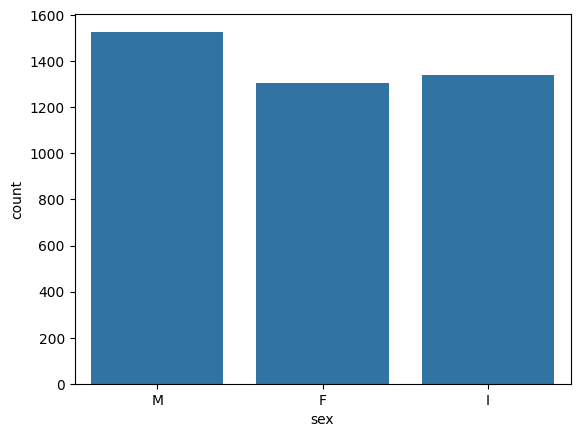

In [74]:
sns.countplot(x=df['sex'])

<Axes: xlabel='rings', ylabel='count'>

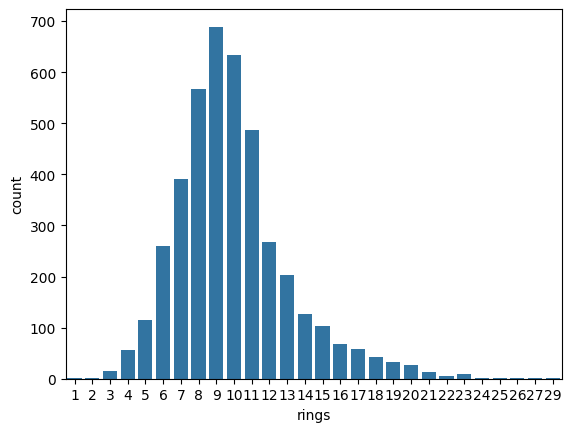

In [75]:
sns.countplot(x=df['rings'])

#data normalization - normal distributuion

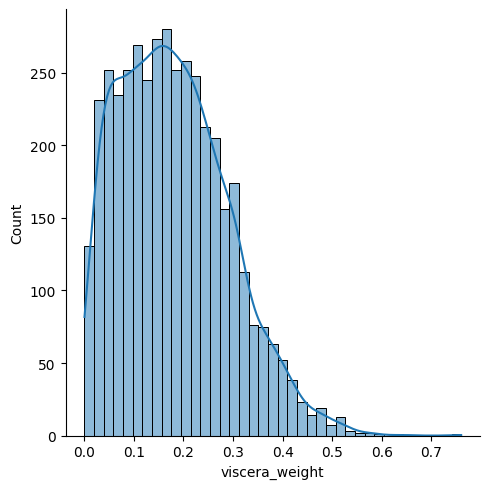

In [77]:
sns.displot(data=df,x="viscera_weight", kde=True)

In [81]:
from scipy import stats
fitted_data , fitted_lambda = stats.boxcox(df['viscera_weight'])

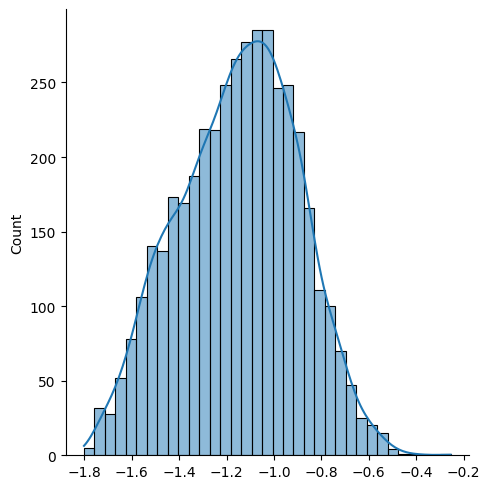

In [82]:
sns.displot(data=fitted_data, kde=True)

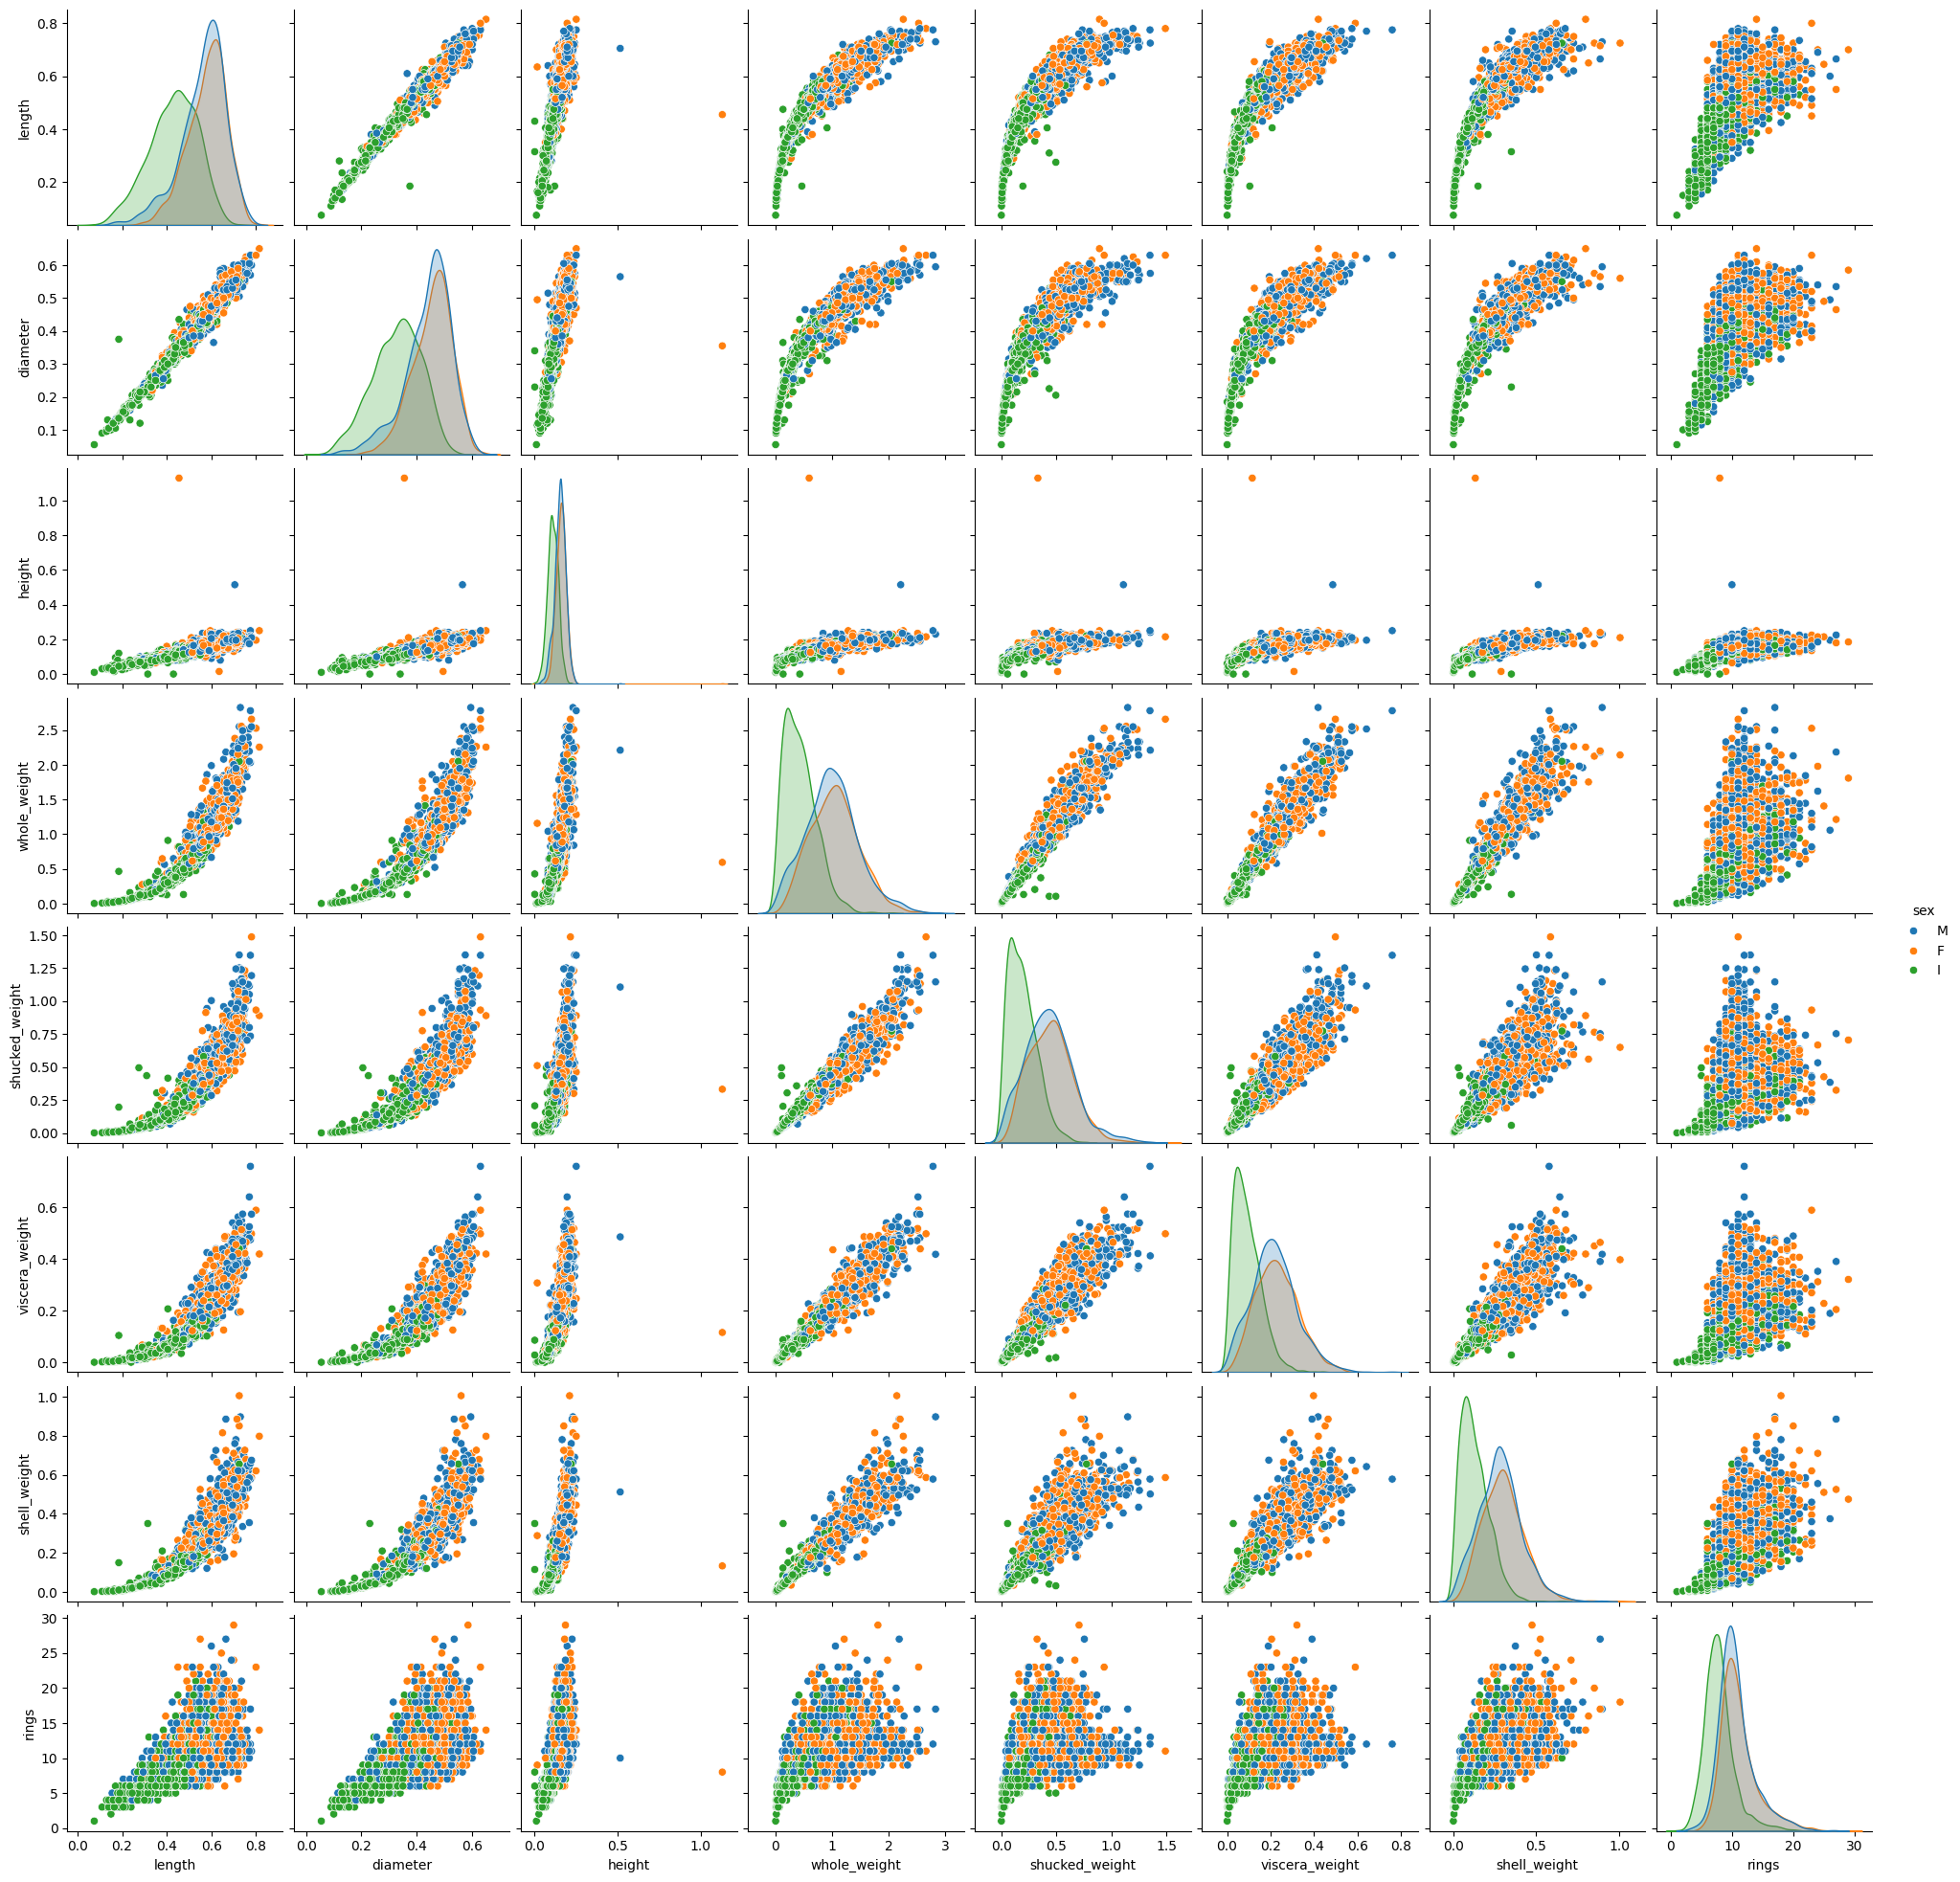

In [83]:
sns.pairplot(data=df,hue='sex')

#model building

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
#data splitting

x = df.drop(['sex'] , axis = 1)
y = df['sex']

In [87]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(x,y)

In [88]:
rf = RandomForestClassifier()
rf.fit(x_train ,y_train)

RandomForestClassifier()

In [89]:
y_predict = rf.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_predict , y_test)

0.5521531100478468

In [91]:


print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           F       0.40      0.47      0.43       286
           I       0.76      0.71      0.73       363
           M       0.51      0.47      0.49       396

    accuracy                           0.55      1045
   macro avg       0.55      0.55      0.55      1045
weighted avg       0.56      0.55      0.56      1045



In [93]:
import pickle
pickle.dump(rf, open(r"C:\Users\poppo\Desktop\github ai\end to end by vivek\data-science-projects\abalone\model\model.pkl", "wb"))

#best features


In [94]:
dictionary = {}
for value, key in zip(rf.feature_importances_, rf.feature_names_in_):
    dictionary[key] = value


In [95]:
sorted(dictionary.items(), key=lambda x:x[1], reverse=True)

[('viscera_weight', 0.17127120452842773),
 ('whole_weight', 0.16835420099294843),
 ('shell_weight', 0.13768893129473284),
 ('shucked_weight', 0.12784126024811732),
 ('diameter', 0.10205728505599464),
 ('height', 0.10121422405591006),
 ('length', 0.09667757497402314),
 ('rings', 0.09489531884984592)]

In [96]:
features = df[['viscera_weight', 'whole_weight', 'shell_weight', 'shucked_weight']]
labels = df['sex']

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels)


In [98]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [99]:
y_predict = rf.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           F       0.46      0.43      0.45       333
           I       0.63      0.69      0.66       326
           M       0.45      0.44      0.45       386

    accuracy                           0.52      1045
   macro avg       0.51      0.52      0.52      1045
weighted avg       0.51      0.52      0.51      1045

